# Hyperparameter Tuning: Group Assignment #2
------------------------------------
**Dr. Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut**

-----------------------------

**Your Name Here:** Adam Syed

We all know accepting the model defaults for sklearn models will give you a reasonable model - but let's push ourselves to get the best model possible!

# Rubric
* If you haven't already, sign up for a ChatGPT account (most students have likely already done this!)
  * Go to this website https://openai.com/blog/chatgpt and click 'Try Now' which will require to make an account
* Now that you are set up with ChatGPT, let's have some fun. Go to the list of sklearn regression models and **pick ONE regression model** that we haven't covered in class like SVM) that you would like to perform hyperparameter tuning.
  * Here are the list of sklearn models: https://scikit-learn.org/stable/supervised_learning.html
  * You can ask ChatGPT something like 'show me how to do hyperparameter tuning on a XYZ model in python (sklearn) and return the best model to predict the test dataset'. Take a screenshot of your output and upload it as an image in your notebook.
* (30 points) Now copy/paste the code into Colab use the raw output from ChatGPT on the CA housing training dataset and then apply to the CA housing test dataset. Make sure you make scatterplots of actual vs. predicted values and calculate error metrics for each partition (R2, MAE, RMSE).
* (30 points) Then play with the values for the grid search (and feel free to add others) and see if you were able to get a better architecture than ChatGPT. You will need to create error metrics and scatterplots for each partition again in order to compare your results.
* (20 points) Students will post to HuskyCT forum for peer review - thoughtful comments must be given (what was good, what could be improved, something new that could be added.)
  * After posting their script for review for peer feedback (as both as shareable link viewable to anyone with the link and as an uploaded file to HuskyCT), students will compare each others code quality and captions (business value of plot and table) and make a suggestions for improvement.
* (20 points) Lastly, make five detailed bullet points about what you learned on your own and what you learned from others during this assignment. Make note of whether or not your grid search was able to beat ChatGPT's grid search and use numbers to back-up your conclusions!

## Examples of common feedback items on HuskyCT
* "For your grid search, you may want to try (larger or smaller) values for X"
* "Your script could be cleaned up a bit, please add some headers and text narrative cells so it is easier to read"
* "I never heard of that algorithm before - I was reading the documentation and noticed this hyperparameter X, maybe you should add it and some candidate values like 1, 10, 100?"
* "If you have such bad results with this model, why don't you choose another one that acts a little more friendly? Not all models are suited to each dataset.'

# Data Processing

In [3]:
import pandas as pd
import numpy as np
#load datasets
train_df = pd.read_csv('/Users/adamyeeter/OPIM 5512 Python/Data/california_housing_train.csv')
test_df = pd.read_csv('/Users/adamyeeter/OPIM 5512 Python/Data/california_housing_test.csv')

train_df.head(), train_df.shape, test_df.shape

(   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -114.31     34.19                15.0       5612.0          1283.0   
 1    -114.47     34.40                19.0       7650.0          1901.0   
 2    -114.56     33.69                17.0        720.0           174.0   
 3    -114.57     33.64                14.0       1501.0           337.0   
 4    -114.57     33.57                20.0       1454.0           326.0   
 
    population  households  median_income  median_house_value  
 0      1015.0       472.0         1.4936             66900.0  
 1      1129.0       463.0         1.8200             80100.0  
 2       333.0       117.0         1.6509             85700.0  
 3       515.0       226.0         3.1917             73400.0  
 4       624.0       262.0         1.9250             65500.0  ,
 (17000, 9),
 (3000, 9))

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#split data
X_train = train_df.drop('median_house_value', axis=1)
y_train = train_df['median_house_value']
X_test = test_df.drop('median_house_value', axis=1)
y_test = test_df['median_house_value']

#convert to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

#scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((17000, 8), (3000, 8))

# ChatGPT Grid Search

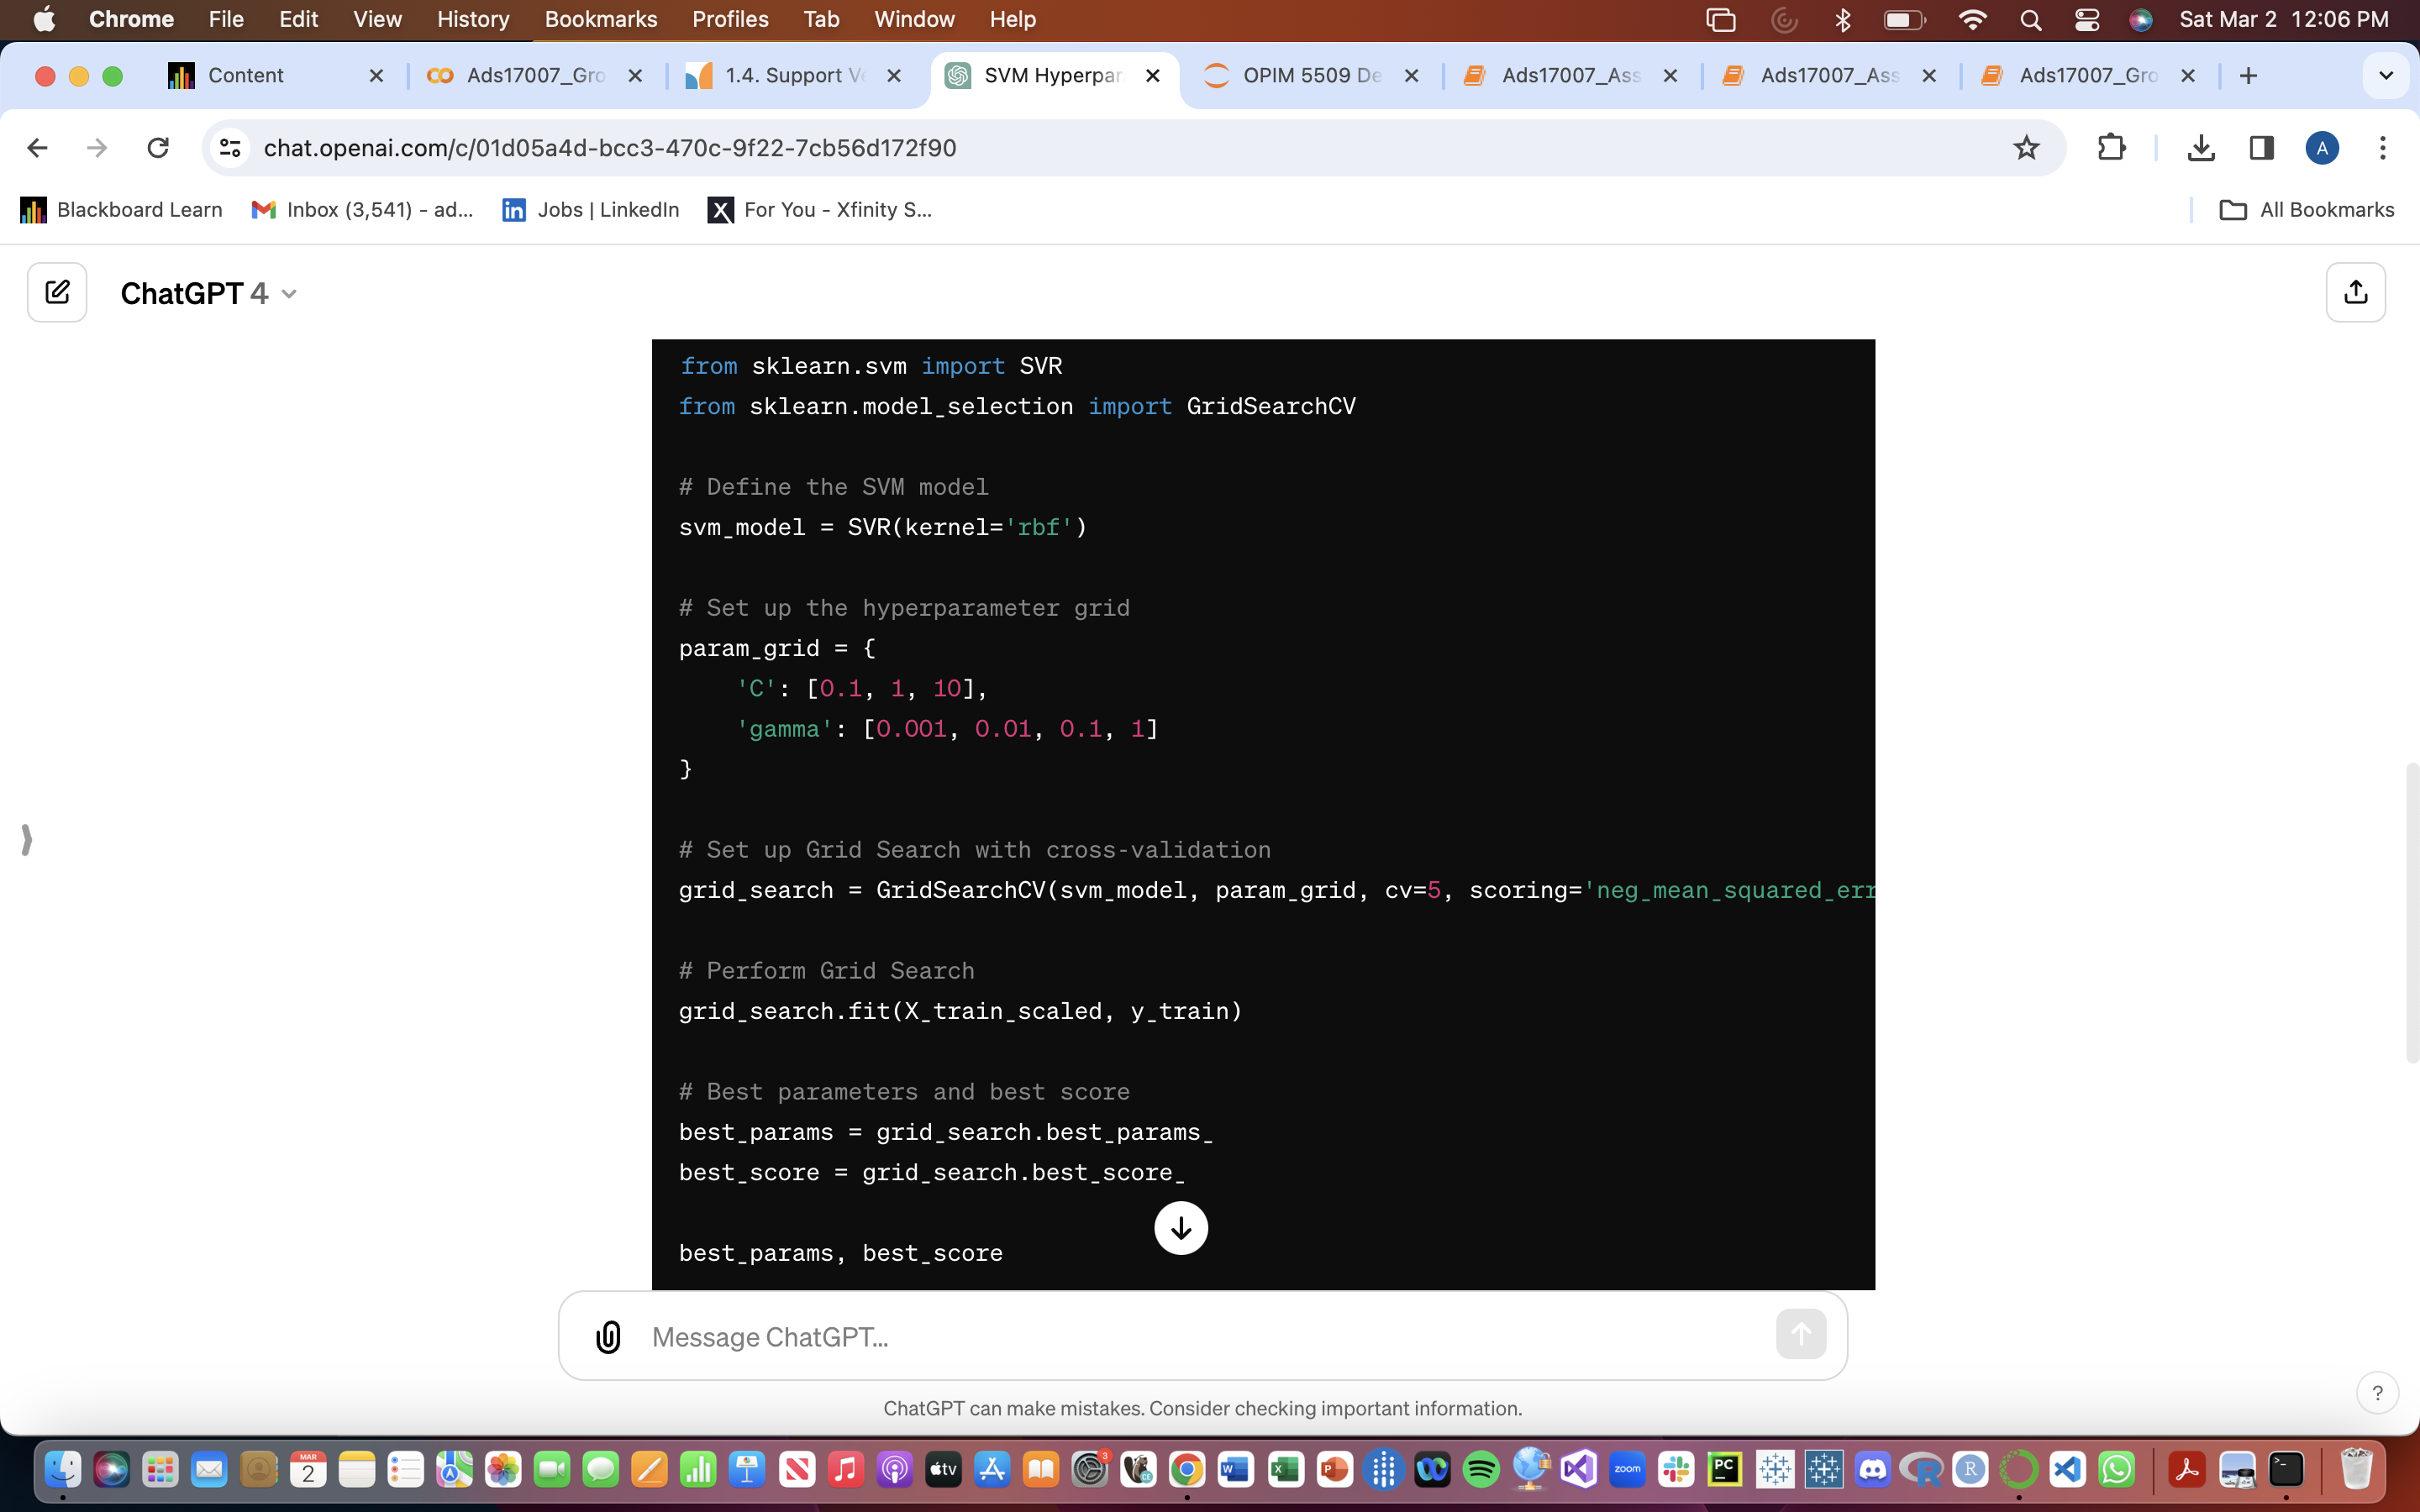

In [5]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the SVM model
svm_model = SVR(kernel='rbf')

# Set up the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 5 folds for each of 12 candidates, totalling 60 fits


({'C': 10, 'gamma': 0.1}, -14237662488.232306)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#store preds
y_train_pred = grid_search.predict(X_train_scaled)
y_test_pred = grid_search.predict(X_test_scaled)

# ChatGPT Model Error Metrics

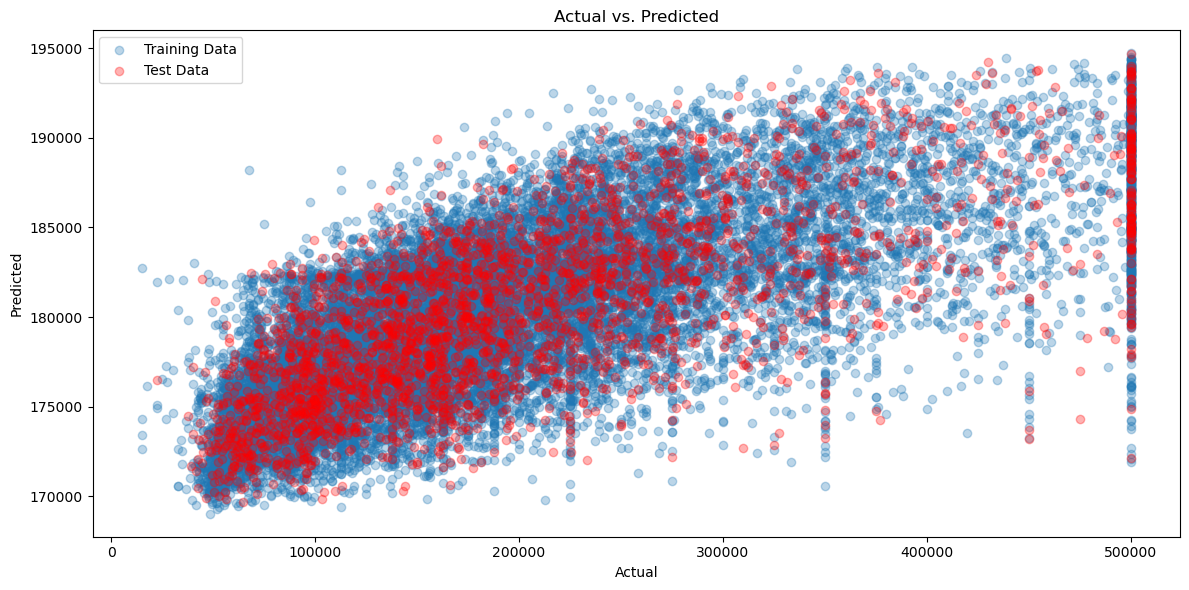

In [7]:
#plot actual vs predicted
plt.figure(figsize=(12, 6))

plt.scatter(y_train, y_train_pred, alpha=0.3, label='Training Data')
plt.scatter(y_test, y_test_pred, alpha=0.3, color='red', label='Test Data')

plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.legend()

plt.tight_layout()
plt.show()

In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt
#train and test MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mae_train

85740.86962970726

In [9]:
mae_test

83658.41377806867

In [10]:
#train and test RMSE
rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))

rmse_train

115560.82770026257

In [11]:
rmse_test

112627.61957098694

In [12]:
#train and test R2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

r2_train

0.00722133676664094

In [13]:
r2_test

0.00835047939398803

# My grid search

In [14]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the SVM model
my_svm_model = SVR(kernel='rbf')

# Set up the hyperparameter grid
my_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

# Set up Grid Search with cross-validation
my_grid_search = GridSearchCV(my_svm_model, my_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Perform Grid Search
my_grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
my_best_params = my_grid_search.best_params_
my_best_score = my_grid_search.best_score_

my_best_params, my_best_score

Fitting 5 folds for each of 25 candidates, totalling 125 fits


({'C': 100, 'gamma': 0.1}, -11244573627.533138)

In [15]:
#store preds
my_y_train_pred = my_grid_search.predict(X_train_scaled)
my_y_test_pred = my_grid_search.predict(X_test_scaled)

# My  Model Error Metrics

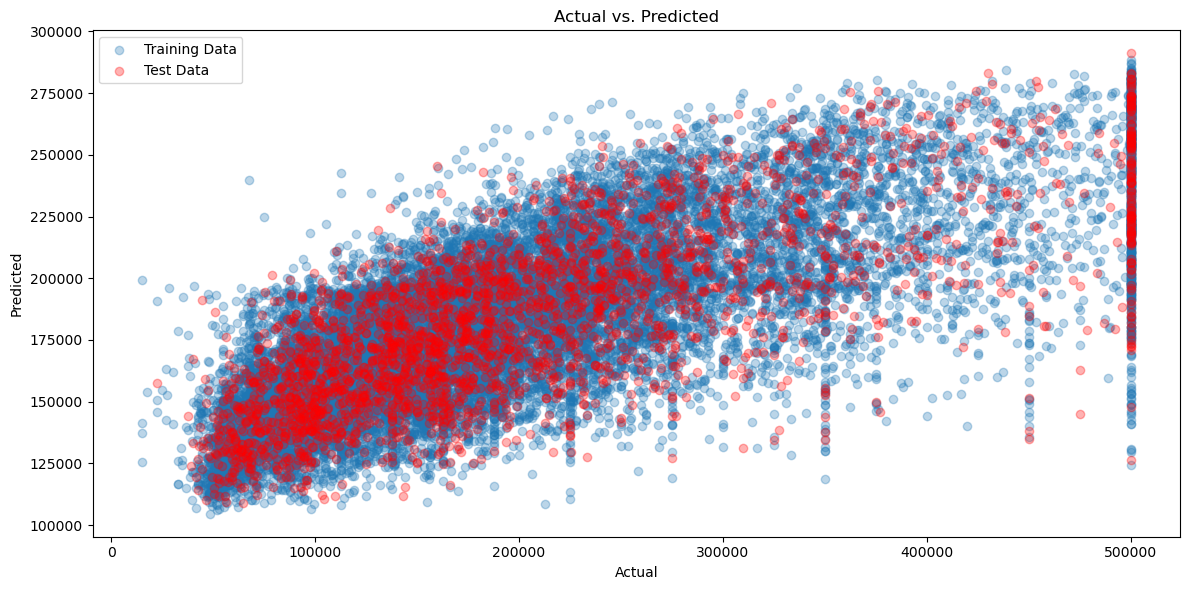

In [16]:
#plot actual vs predicted
plt.figure(figsize=(12, 6))

plt.scatter(y_train, my_y_train_pred, alpha=0.3, label='Training Data')
plt.scatter(y_test, my_y_test_pred, alpha=0.3, color='red', label='Test Data')

plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.legend()

plt.tight_layout()
plt.show()

In [17]:
#train and test MAE
my_mae_train = mean_absolute_error(y_train, my_y_train_pred)
my_mae_test = mean_absolute_error(y_test, y_test_pred)

my_mae_train

68840.03664014413

In [18]:
my_mae_test

83658.41377806867

In [19]:
#train and test RMSE
my_rmse_train = sqrt(mean_squared_error(y_train, my_y_train_pred))
my_rmse_test = sqrt(mean_squared_error(y_test, my_y_test_pred))

my_rmse_train

95492.7711356338

In [20]:
my_rmse_test

93854.14512060794

In [21]:
#train and test R2
my_r2_test = r2_score(y_test, my_y_test_pred)
my_r2_train = r2_score(y_train, my_y_train_pred)

my_r2_train

0.3220898443342095

In [22]:
my_r2_test

0.31138684936157945

# Bullet points (comparison of results)

Throughout this assignment I learned how to fit a SVM model (this was my first time doing this).

I also learned how important it is to tune the hyperparameters in a SVM model. In my model, I extended the grid for the hyperparameters "C" and "gamma". The result was lower values for MAE and RMSE for both partitions and higher values for R2 for both partitions.

I also learned that these models are complex and use a lot of computational power. It took a long time to run the modeling code cells. 

I also learned that standardization of the data is essential before fitting the SVM model. 

Finally, I learned that it is easy to compare these models, I used the same techniques to compare them that I have used for other types of models in the past. 

My model did beat ChatGPT's model. My train R2 was 0.322 and my test R2 was 0.311. This is much higher than the ChatGPT R2 values which are, 0.007 for train and 0.008 for test. 

Also, my mae values were lower than ChatGPT's. My values were 68840.037 for mae train and 67552.219 for mae test. Chat GPT's values were 85740.870 for mae train and 83658.414 for mae test.

Also, my rmse values were lower than Chat GPT's. My values were 95492.771 for rmse train and 93854.145 for rmse test. Chat GPT's values were 115560.828 for rmse train and 112627.620 for rmse test.

Based on peer feedback, I converted my X_train, X_test, y_train, and y_test data to numpy arrays.